In [2]:
*| echo: true
*| code-fold: false
*| output: false

use data_slides/sp500.dta, clear
gen return = (value - value[_n-1])/value[_n-1]
gen lost5 = return < -0.05
set seed 1

** Simulation
gen mn_lost5=.
forvalues i = 1/1000 {
    preserve
      qui:sample 500, count
      sum lost5 , meanonly
    restore
    qui:replace mn_lost5 = r(mean) in `i'
}

(1 missing value generated)
(2,519 missing values generated)


(start=0, width=.002)


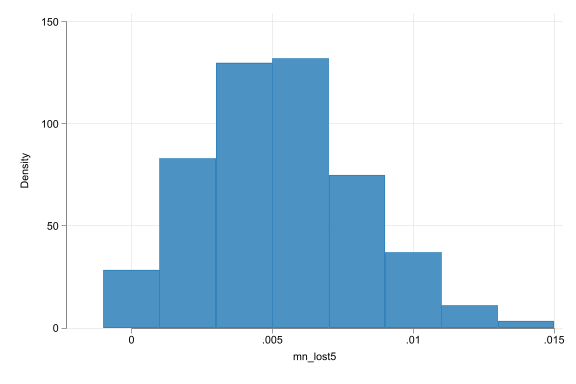

In [3]:
*| echo: false
*| fig-align: center
qui:set scheme white2
qui:color_style tableau
histogram mn_lost5,d

In [4]:
*| echo: true
*| code-fold: false
*| output: false
display "Bootstrap"
bootstrap mean=r(mean), nowarn reps(1000) seed(1) dots(100): sum lost5, meanonly
est sto m1
display "Formula"
mean lost5
est sto m2

Bootstrap
(running summarize on estimation sample)



Bootstrap replications (1,000)
----+--- 1 ---+--- 2 ---+--- 3 ---+--- 4 ---+--- 5 


.

.

.

.

.

.

.

.

.

.



Bootstrap results                                        Number of obs = 2,519
                                                         Replications  = 1,000

      Command: summarize lost5, meanonly
         mean: r(mean)



------------------------------------------------------------------------------


             |   Observed   Bootstrap                         Normal-based


             | coefficient  std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------


        mean |

   .0051608   .0014482     3.56   0.000     .0023224    .0079991


------------------------------------------------------------------------------


Formula



Mean estimation                          Number of obs = 2,519



--------------------------------------------------------------
             |       Mean   Std. err.     [95% conf. interval]
-------------+------------------------------------------------
       lost5 |   .0051608   .0014279      .0023607    .0079608
--------------------------------------------------------------


In [5]:
*| echo: false
*| code-fold: false
*| output: asis
set linesize 255
esttab m1 m2, ci wide nonumber  b(%5.4f) md compress nostar note("") varlabel(mean "Formula" lost5 "Bootstrap") 



|            |           |                  |      Mean |                  |
| ---------- | :-------: | :--------------: | :-------: | :--------------: |
| Formula    |    0.0052 |  [0.0023,0.0080] |           |                  |
| Bootstrap  |           |                  |    0.0052 |  [0.0024,0.0080] |
| *N*        |      2519 |                  |      2519 |                  |



